# Hypothesis testing

With hypothesis testing a general conclusion is made about a large group (a population)
based on the analysis and measurements performed on a smaller group (a sample).

In general, a null hypothesis and a complementary alternative are defined, a test statistic whose value (a quantity calculated from the sample) is the basis for accepting or rejecting the null hypothesis is identified, and a significance level specified. Once a significance level is specified, the rejection points are computed, which are the values with which the test statistic is compared.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Warnings
import warnings

# Mathematical operations and data manipulation
import pandas as pd
import random

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

warnings.filterwarnings("ignore")
%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load hourly data
dataset = pd.read_csv(f"{data_path}/preprocessed_hour.csv")
dataset.head()

instant      dteday  season    yr  mnth  hr  holiday   weekday  workingday  \
0        1  2011-01-01  winter  2011     1   0        0  Saturday           0   
1        2  2011-01-01  winter  2011     1   1        0  Saturday           0   
2        3  2011-01-01  winter  2011     1   2        0  Saturday           0   
3        4  2011-01-01  winter  2011     1   3        0  Saturday           0   
4        5  2011-01-01  winter  2011     1   4        0  Saturday           0   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0      clear  0.24  0.2879  81.0        0.0       3          13   16  
1      clear  0.22  0.2727  80.0        0.0       8          32   40  
2      clear  0.22  0.2727  80.0        0.0       5          27   32  
3      clear  0.24  0.2879  75.0        0.0       3          10   13  
4      clear  0.24  0.2879  75.0        0.0       0           1    1

In [4]:
# print some generic statistics about the data
print(f"Shape of data: {dataset.shape}")
print(f"Number of missing values in the data: {dataset.isnull().sum().sum()}")

# get statistics on the numerical columns
dataset.describe().T

Shape of data: (17379, 17)
Number of missing values in the data: 0


count         mean          std      min        25%        50%  \
instant     17379.0  8690.000000  5017.029500     1.00  4345.5000  8690.0000   
yr          17379.0  2011.502561     0.500008  2011.00  2011.0000  2012.0000   
mnth        17379.0     6.537775     3.438776     1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405     0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165     0.00     0.0000     0.0000   
workingday  17379.0     0.682721     0.465431     0.00     0.0000     1.0000   
temp        17379.0     0.496987     0.192556     0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850     0.00     0.3333     0.4848   
hum         17379.0    62.722884    19.292983     0.00    48.0000    63.0000   
windspeed   17379.0    12.736540     8.196795     0.00     7.0015    12.9980   
casual      17379.0    35.676218    49.305030     0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286     0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599     1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
yr           2012.0000   2012.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
workingday      1.0000      1.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum            78.0000    100.0000  
windspeed      16.9979     56.9969  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

<a id="average-registered-rides"></a>
## Estimating average registered rides

In [5]:
# Computing population mean of registered rides
population_mean = dataset.registered.mean()

# Sample of the data (summer 2011)
sample = dataset[
    (dataset.season == "summer") & (dataset.yr == 2011)
].registered

# t-test and computing p-value
test_result = ttest_1samp(sample, population_mean)
print(
    f"Test statistic: {test_result[0]:.03f}, "
    f"p-value: {test_result[1]:.03f}"
)

# Sample as 5% of the full data
random.seed(111)
sample_unbiased = dataset.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(
    f"Unbiased test statistic: {test_result_unbiased[0]:.03f}, "
    f"p-value: {test_result_unbiased[1]:.03f}"
)

Test statistic: -3.492, p-value: 0.000
Unbiased test statistic: -2.620, p-value: 0.009


<a id="hypothesis-testing"></a>
## Hypothesis testing on registered rides

Statistic value: -16.004, p-value: 0.000


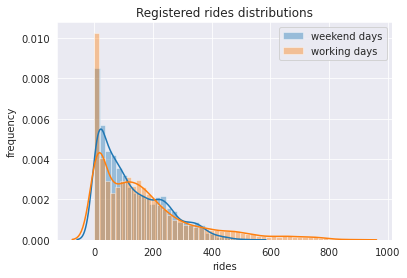

In [6]:
# Defining mask, indicating if the day is weekend or work day
weekend_days = ["Saturday", "Sunday"]
weekend_mask = dataset.weekday.isin(weekend_days)
workingdays_mask = ~dataset.weekday.isin(weekend_days)

# Selecting registered rides for the weekend and working days
weekend_data = dataset.registered[weekend_mask]
workingdays_data = dataset.registered[workingdays_mask]

# t-test
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

# Plotting distributions of registered rides for working vs weekend days
sns.distplot(weekend_data, label="weekend days")
sns.distplot(workingdays_data, label="working days")
plt.legend()
plt.xlabel("rides")
plt.ylabel("frequency")
plt.title("Registered rides distributions")
plt.savefig(f"{assets_path}/hypothesis_testing_a.png", format="png")

Statistic value: 41.077, p-value: 0.000


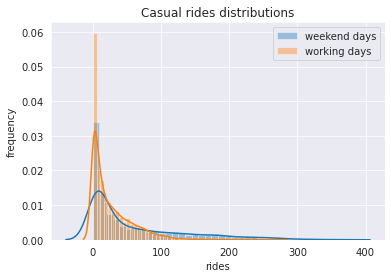

In [7]:
# Selecting casual rides for the weekend and working days
weekend_data = dataset.casual[weekend_mask]
workingdays_data = dataset.casual[workingdays_mask]

# t-test
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

# Plotting distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label="weekend days")
sns.distplot(workingdays_data, label="working days")
plt.legend()
plt.xlabel("rides")
plt.ylabel("frequency")
plt.title("Casual rides distributions")
plt.savefig(f"{assets_path}/hypothesis_testing_b.png", format="png")